In [5]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
data = pd.read_csv("../input/vgsales.csv")

In [7]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
data.shape

(16598, 11)

In [11]:
data.Genre.value_counts()


Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

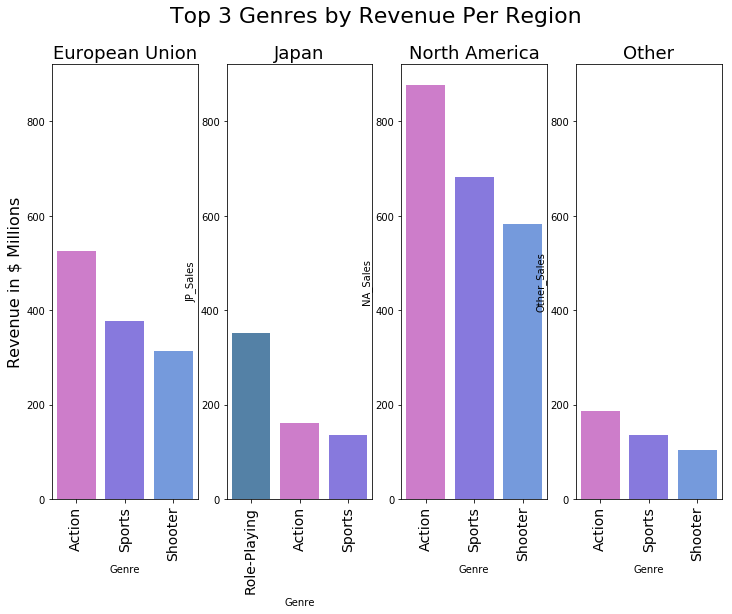

In [12]:
EU = data.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[:3]
EU_genres = EU.index

JP = data.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[:3]
JP_genres = JP.index

NA = data.pivot_table("NA_Sales", columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by="NA_Sales", ascending=False).iloc[:3]
NA_genres = NA.index

Other = data.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_genres = Other.index

colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_genres, rotation=90, size=14)
sn.barplot(x=EU_genres, y=EU["EU_Sales"], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, rotation=90, size=14)

sn.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, rotation=90, size=14)

sn.barplot(x=NA_genres, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)

sn.barplot(x=Other_genres, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();

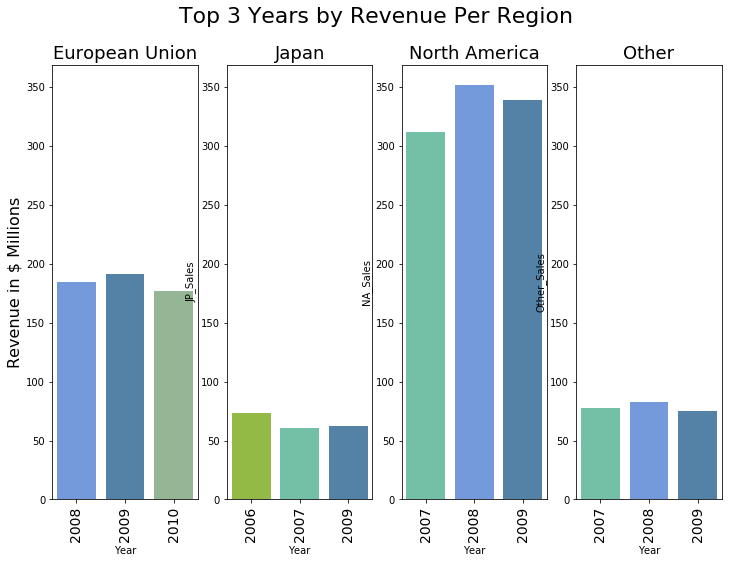

In [13]:
EU = data.pivot_table('EU_Sales', columns='Year', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_years = EU.index.astype(int)

JP = data.pivot_table('JP_Sales', columns='Year', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_years = JP.index.astype(int)

NA = data.pivot_table('NA_Sales', columns='Year', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_years = NA.index.astype(int)

Other = data.pivot_table('Other_Sales', columns='Year', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_years = Other.index.astype(int)

colors =  {2006.0:"yellowgreen", 2007.0:"mediumaquamarine", 2008.0:"cornflowerblue", 2009.0:"steelblue", 2010.0:"darkseagreen"}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_years, rotation=90, size=14)

sn.barplot(x=EU_years, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_years, rotation=90, size=14)

sn.barplot(x=JP_years, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_years, rotation=90, size=14)
sn.barplot(x=NA_years, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
sn.barplot(x=Other_years, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Years by Revenue Per Region', size=22)
plt.show();

Text(0.5, 0, 'Genre')

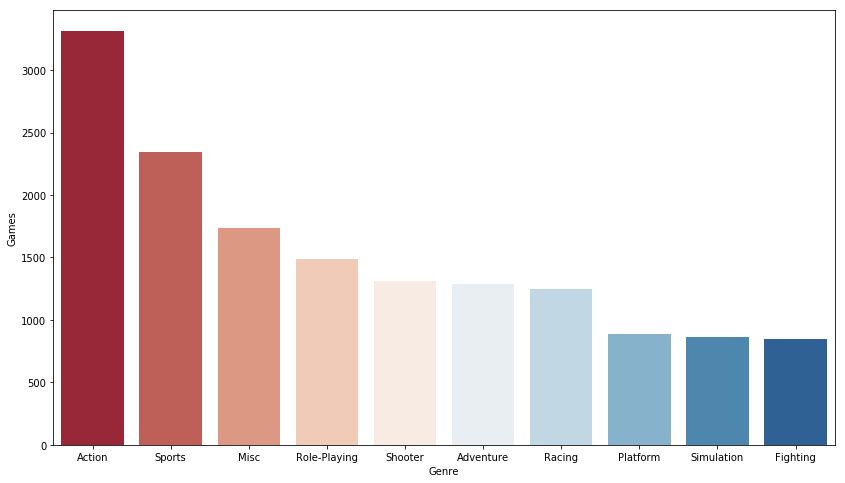

In [14]:
df2 = data.Genre.value_counts().sort_values(ascending=False).head(10)
df2 = pd.DataFrame(df2)
genres = df2.index
df2.columns = ['Games']

plt.figure(figsize=(14,8))

colors = sn.color_palette("RdBu", n_colors=10)
ax = sn.barplot(x=genres,y='Games', data=df2, palette=colors)
ax.set_xlabel(xlabel='Genre')

Text(0.5, 0, 'Publishers')

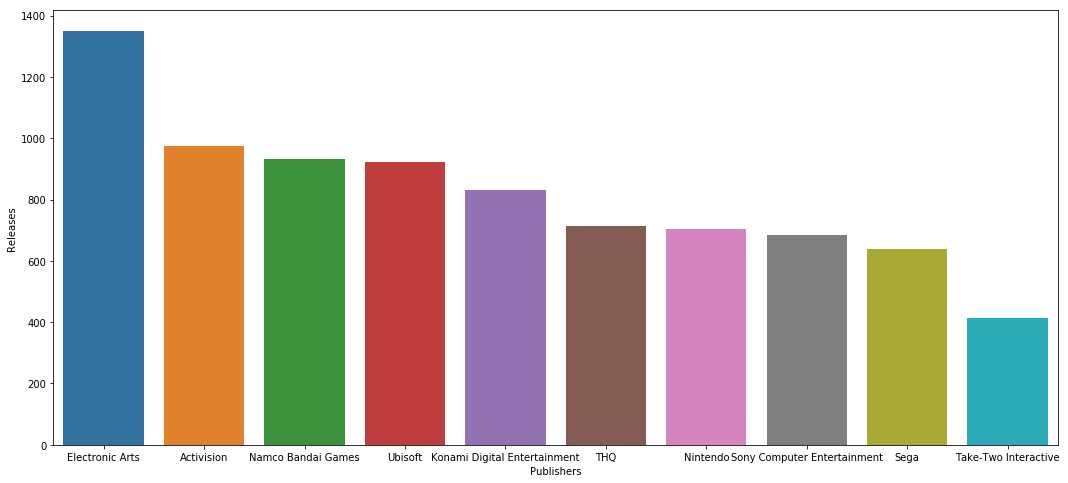

In [15]:
df = data.Publisher.value_counts().sort_values(ascending=False).head(10)
df = pd.DataFrame(df)
publishers = df.index
df.columns = ['Releases']
df
plt.figure(figsize=(18,8))
ax = sn.barplot(x=publishers, y='Releases', data = df)
ax.set_xlabel(xlabel='Publishers')

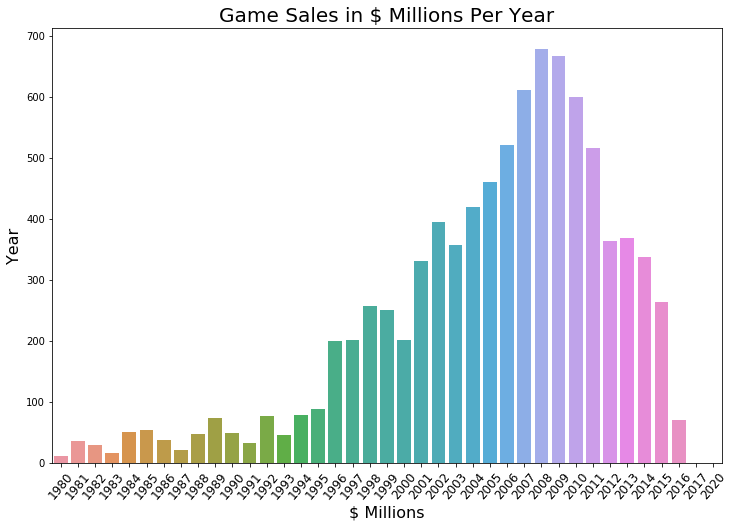

In [16]:
y = data.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sn.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

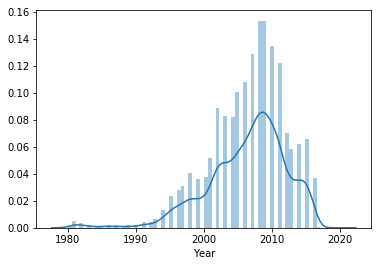

In [17]:
sn.distplot(data['Year'],
                 kde=True,
                 rug = False,         # Show vertical lines at bottom, density of points wise
                 bins = 70
                 )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


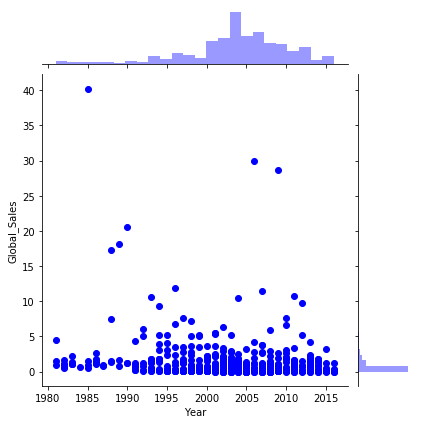

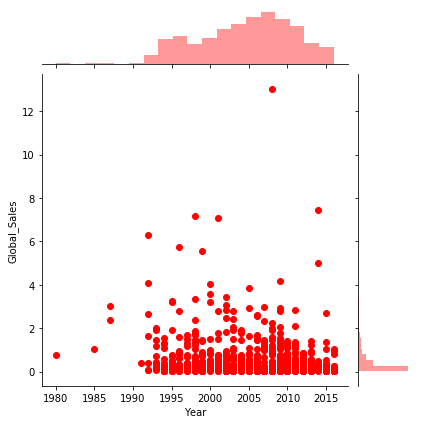

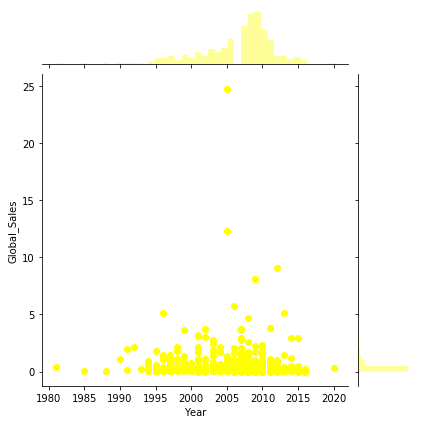

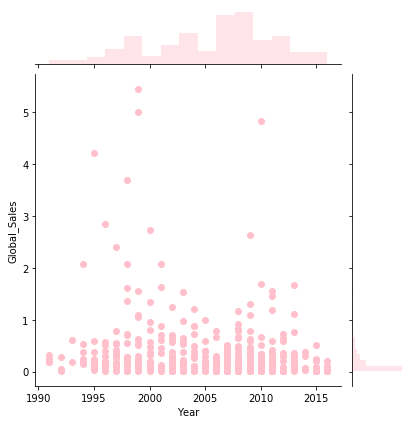

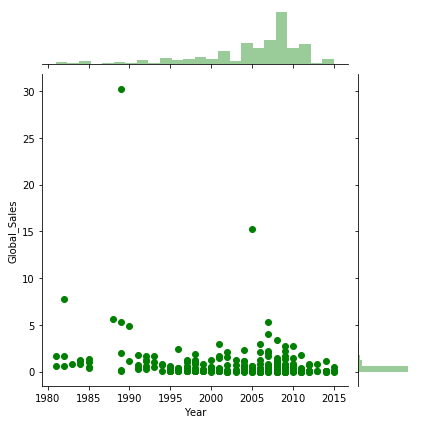

In [18]:
pdata = data[data['Genre'] == 'Puzzle']
sdata = data[data['Genre'] == 'Strategy']
fdata = data[data['Genre'] == 'Fighting']
sidata = data[data['Genre'] == 'Simulation']
pldata = data[data['Genre'] == 'Platform']

sn.jointplot( "Year", "Global_Sales",data=pldata, color='blue')

sn.jointplot("Year", "Global_Sales",data=fdata, color='red')

sn.jointplot("Year", "Global_Sales",data=sidata, color='yellow')

sn.jointplot("Year", "Global_Sales",data=sdata, color='pink')

sn.jointplot("Year", "Global_Sales",data=pdata, color='green')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Fighting')

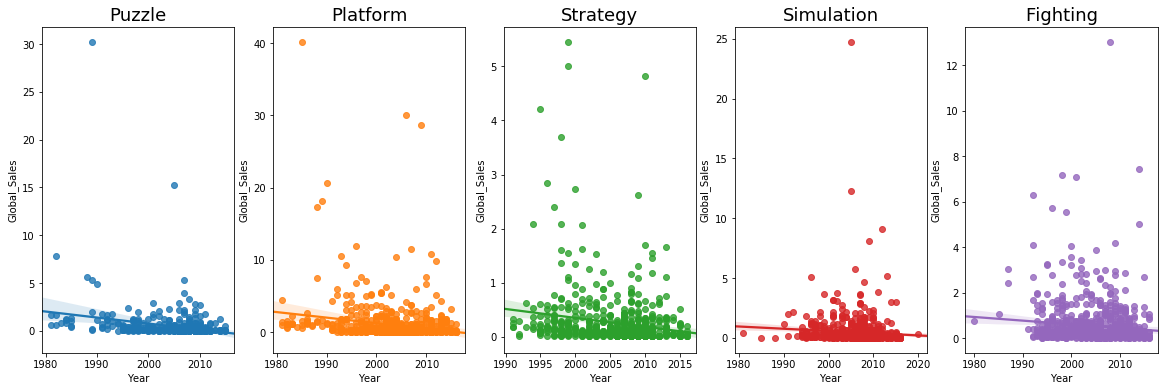

In [19]:
fig, axs = plt.subplots(ncols=5,figsize=(20,6))

sn.regplot(x='Year', y='Global_Sales', data=pdata, ax=axs[0])
axs[0].set_title('Puzzle', fontsize=18)

sn.regplot(x='Year', y='Global_Sales', data=pldata, ax=axs[1])
axs[1].set_title('Platform', fontsize=18)

sn.regplot(x='Year',y='Global_Sales', data=sdata, ax=axs[2])
axs[2].set_title('Strategy', fontsize=18)

sn.regplot(x='Year',y='Global_Sales', data=sidata, ax=axs[3])
axs[3].set_title('Simulation', fontsize=18)

sn.regplot(x='Year',y='Global_Sales', data=fdata, ax=axs[4])
axs[4].set_title('Fighting', fontsize=18)

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


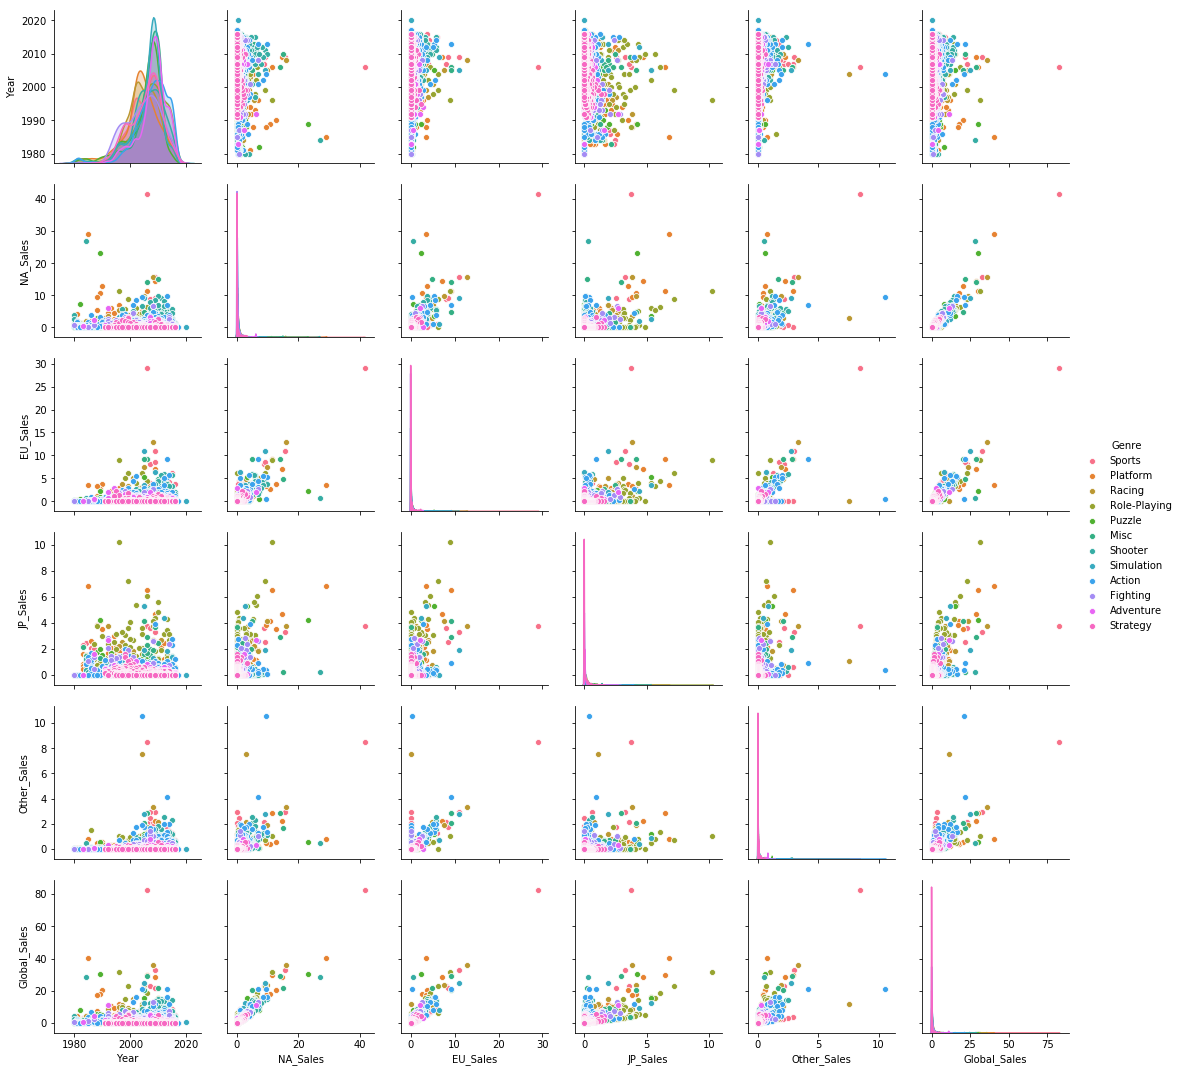

In [20]:
df5 = data.drop('Rank', axis=1)
sn.pairplot(df5,hue='Genre')